# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [430]:
heroes_df = pd.read_csv('heroes_information.csv', index_col = 'Unnamed: 0')
display(heroes_df.head(3), heroes_df.shape)

powers_df = pd.read_csv('super_hero_powers.csv')
display(powers_df.head(3), powers_df.shape)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


(734, 10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(667, 168)

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [417]:
print('already dropped in previous steps')

already dropped in previous steps


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [431]:
# heroes_df
display(heroes_df.info(),
        'shape is:', heroes_df.shape,
        'values are:', heroes_df.isna().sum())

#for col in heroes_df.columns:
#    display(heroes_df[col].value_counts())

# power_df
display(powers_df.info(),
        'shape is:', powers_df.shape)
        

for col in powers_df.columns:
    if powers_df[col].isna().any() == True:
        print(powers_df[col].isna().sum())

for col in powers_df.columns:
    if powers_df[col].value_counts().count() != 2:
        display(powers_df[col].value_counts().count())
    
    #display(powers_df[col].value_counts(), type(powers_df[col].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


None

'shape is:'

(734, 10)

'values are:'

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

'shape is:'

(667, 168)

667

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:  
1. In heroes_df I detected NaNs in Publisher (15 of 734) and Weight (2 of 734). Strategies are to rename NaN in Publisher as 'Unknown' (since, it is not crucial here), and Median (with distr check) for Weight.  
2. In numerical data variables (Height and Weight) - outliers (-99) noticed. It will be replaced by median values, where medians will be calculated on adjusted data series (with positive values only). Same median for Weight is applied on NaN in step 1.
3. In some of categorical data placeholders ('-') give specific information, so here it renamed to 'non-applicable' {Gender, Eye Color, Hair Color}, for others {Race, Alignment} 'undefined' was used. It SkinColor - too much data is missed, so I dropped this variable.
3. In powers No NaNs detected. Also no placeholders were detected here.  

In [432]:
# step 1. Modifying heroes_df NaNs in publisher.

heroes_df.Publisher = heroes_df.Publisher.fillna('Unknown')
display(heroes_df.isna().sum())
display(heroes_df.Publisher.unique())
#for col in heroes_df.columns:
#    display(heroes_df[col].value_counts())

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Unknown', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

this is density with outliers


count    495.000000
mean     112.252525
std      104.151142
min        2.000000
25%       61.000000
50%       81.000000
75%      108.000000
max      900.000000
Name: Weight, dtype: float64

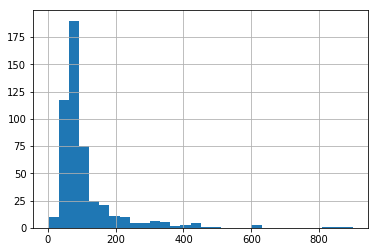

In [132]:
#Step 2. Exploring statistics of Weight
display(heroes_df.Weight.describe())
#display(heroes_df['Weight'].hist(bins=100))
print('this is density with outliers')


adj_heroes = heroes_df.loc[heroes_df['Weight']>0]
display(adj_heroes.Weight.describe())
display(adj_heroes['Weight'].hist(bins=30))

#so target median is 81
weight_median = heroes_df.loc[heroes_df['Weight']>0].median()[1]

In [433]:
# step 3. Dealing with Weight and Height. 

heroes_df['Weight'] = heroes_df['Weight'].map(lambda x: weight_median if x<0 else x)
heroes_df.Weight = heroes_df.Weight.fillna(value=weight_median)

height_median = heroes_df.loc[heroes_df['Height']>0].median()[1]
heroes_df['Height'] = heroes_df['Height'].map(lambda x: height_median if x<0 else x)

display(heroes_df.Weight.isna().sum())
display(heroes_df.head())

#display(heroes_df.Weight.describe())
#display(heroes_df['Weight'].hist(bins=30))
#display(heroes_df.Height.describe())
#display(heroes_df['Height'].hist(bins=30))

0

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,-,bad,81.0


In [434]:
# step 4. Categorical data
heroes_df = heroes_df.drop('Skin color', axis=1)

heroes_df[['Gender','Eye color','Hair color']] = heroes_df[[
    'Gender','Eye color','Hair color']].applymap(lambda x: 'Not applicable' if x=='-' else x)

heroes_df[['Race','Alignment']] = heroes_df[['Race','Alignment'
                                            ]].applymap(lambda x: 'Undefined' if x=='-' else x)


heroes_df



,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,bad,81.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,Undefined,Blond,81.0,NBC - Heroes,good,81.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0
8,Agent 13,Female,blue,Undefined,Blond,173.0,Marvel Comics,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,good,81.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [435]:
# 1. we need to correct names. Let's rename hero_names to Name in second df
powers_df = powers_df.rename(columns = {'hero_names':'name'})
# 2. lets set name as index in both df in order to avoid errors in join

powers_df = powers_df.set_index('name')
display(powers_df.head())
heroes_df = heroes_df.set_index('name')
display(heroes_df.head())

#3. Join
main_df = heroes_df.join(powers_df, how='left', sort=True)
#display(main_df.shape)
#display(main_df.head())
display(main_df.columns)
display(main_df.head())
#main_df.reset_index(inplace=True)
display(main_df.head())

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,bad,81.0


Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Alignment', 'Weight', 'Agility', 'Accelerated Healing',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=175)

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,bad,81.0,False,False,...,False,False,False,False,False,False,False,False,False,False


,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,bad,81.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

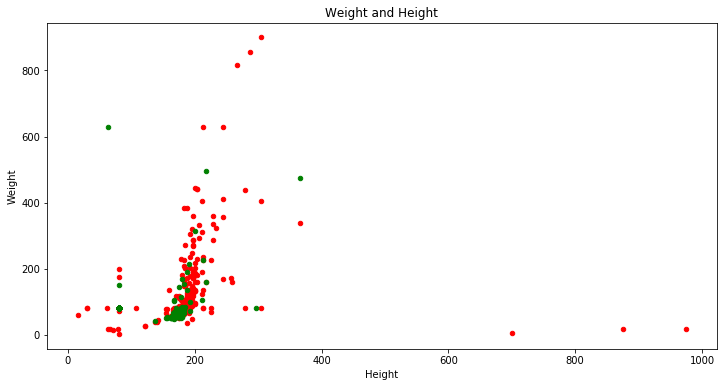

In [436]:
male_heroes_df = main_df.drop(main_df.loc[main_df['Gender']=='Female'].index, axis=0)
male_heroes_df = male_heroes_df.drop('Gender',axis=1)
#display(male_heroes_df.head())

female_heroes_df = main_df.drop(main_df.loc[main_df['Gender']!='Female'].index, axis=0)
female_heroes_df = female_heroes_df.drop('Gender',axis=1)
#display(female_heroes_df.head())

fig, ax = plt.subplots(figsize=(12,6))

male_heroes_df.plot('Height','Weight',kind='scatter', ax=ax,title='Weight and Height', c='red')
female_heroes_df.plot.scatter('Height','Weight', ax=ax,title='Weight and Height', c='green', legend=True)
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [437]:
def show_distplot(dataframe, gender, column_name):
    sns.distplot((dataframe.loc[dataframe.Gender==gender][column_name]))   #,axlabel='aaa']);


display(male_heroes_df.describe())
display(female_heroes_df.describe())

,Height,Weight
count,530.000000,530.000000
mean,158.271698,110.720755
std,76.037530,92.613867
min,15.200000,2.000000
25%,81.000000,81.000000
50%,180.000000,81.000000
75%,188.000000,99.000000
max,975.000000,900.000000


,Height,Weight
count,196.000000,196.000000
mean,148.477041,79.719388
std,46.857813,65.419575
min,62.500000,41.000000
25%,81.000000,55.000000
50%,168.000000,63.000000
75%,175.000000,81.000000
max,366.000000,630.000000


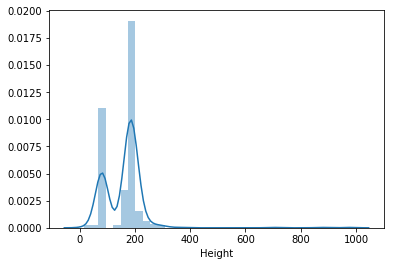

In [438]:
# Male Height
show_distplot(main_df,'Male','Height')

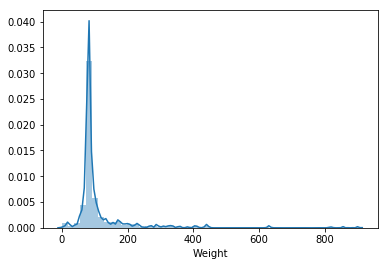

In [439]:
# Male Weight
show_distplot(main_df,'Male','Weight')

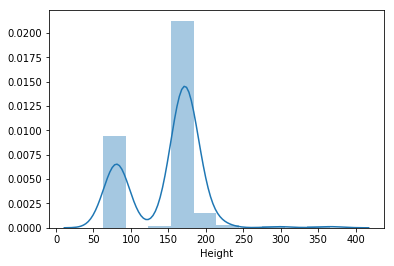

In [440]:
# Female Height
show_distplot(main_df,'Female','Height')

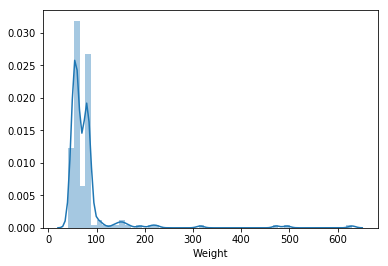

In [441]:
# Female Weight
show_distplot(main_df,'Female','Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
___________________________________________________________________________________________________________________________Male stats: 
Height - Mean<Median, the most important is - 2-peak density, so we can split it to 2 subgroups for further analysis.    Weight - density is 1-peak, and there are several outliers from right side which leads to MEAN>MEDIAN  
Female stats:  
Height - 2-peak density.  
Weight - density is 1-peak, and there are several outliers from right side which leads to MEAN>MEDIAN.  
General issues:  
(1) in the both subgroups there are few outliers in Height param ('Giants'), but it not influenced much on stats (MEAN<P50).  
(2) also we can see, that there are 2 groups of heroes: 'Normal' (160-200 cm), and 'Dwarphs' (height<100 cm), which we can observe from hists.
(3) Despite of the facts, that we have high variance in height, weight params for Male and Female groups quite centered. The only thing need to be mentioned here is that density is skewed (MEAN>MEDIAN), because of GIANTS outliers.



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [442]:
display(main_df.head())
display(main_df.columns[8:])

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,81.0,Marvel Comics,bad,81.0,False,False,...,False,False,False,False,False,False,False,False,False,False


Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [519]:
# Analyzing power level. Power level - sum of abilities
def bool_to_sum(x):
    if x == True:
        return 1
    else:
        return 0

main_df_1 = main_df.iloc[:,8:]

main_df_1 = main_df_1.fillna(False)
main_df_1= main_df_1.applymap(lambda x: bool_to_sum(x))
main_df_1.head()
power_list = []

x = len(main_df_1.columns)
for i in range(main_df_1.shape[0]):
    x = sum(main_df_1.iloc[i])
    power_list.append(x)

main_df_1['Power'] = power_list
main_df_1['Publisher'] = main_df['Publisher']
main_df_1['Gender'] = main_df['Gender']
main_df_1['Alignment'] = main_df['Alignment']
main_df_1['Weight'] = main_df['Weight']
main_df_1['Height'] = main_df['Height']


main_df_1 = main_df_1.iloc[:,-6:]
main_df_1_sorted = main_df_1.sort_values('Power', ascending=False)


# Power level for all heroes
display(main_df_1_sorted.head(5))

# Power level for Marvel heroes
display(main_df_1_sorted.loc[main_df_1_sorted['Publisher']=='Marvel Comics'].head(5))

# Power level for all heroes
display(main_df_1_sorted.loc[main_df_1_sorted['Publisher']=='DC Comics'].head(5))

,Power,Publisher,Gender,Alignment,Weight,Height
name,,,,,,
Spectre,49,DC Comics,Male,good,81.0,81.0
Amazo,44,DC Comics,Male,bad,173.0,257.0
Martian Manhunter,35,DC Comics,Male,good,135.0,201.0
Living Tribunal,35,Marvel Comics,Not applicable,neutral,81.0,81.0
Man of Miracles,34,Image Comics,Not applicable,Undefined,81.0,81.0


,Power,Publisher,Gender,Alignment,Weight,Height
name,,,,,,
Living Tribunal,35,Marvel Comics,Not applicable,neutral,81.0,81.0
Captain Marvel,33,Marvel Comics,Female,good,74.0,180.0
Galactus,32,Marvel Comics,Male,neutral,16.0,876.0
Odin,31,Marvel Comics,Male,good,293.0,206.0
One-Above-All,31,Marvel Comics,Not applicable,neutral,81.0,81.0


,Power,Publisher,Gender,Alignment,Weight,Height
name,,,,,,
Spectre,49,DC Comics,Male,good,81.0,81.0
Amazo,44,DC Comics,Male,bad,173.0,257.0
Martian Manhunter,35,DC Comics,Male,good,135.0,201.0
Captain Marvel,33,DC Comics,Male,good,101.0,193.0
Mister Mxyzptlk,31,DC Comics,Male,bad,81.0,81.0


In [520]:
# Power level for male and female heroes

# Power level for Male heroes
display(main_df_1_sorted.loc[main_df_1_sorted['Gender']=='Male'].head(10))

# Power level for Marvel heroes
display(main_df_1_sorted.loc[main_df_1_sorted['Gender']=='Female'].head(10))


,Power,Publisher,Gender,Alignment,Weight,Height
name,,,,,,
Spectre,49,DC Comics,Male,good,81.0,81.0
Amazo,44,DC Comics,Male,bad,173.0,257.0
Martian Manhunter,35,DC Comics,Male,good,135.0,201.0
Captain Marvel,33,DC Comics,Male,good,101.0,193.0
Galactus,32,Marvel Comics,Male,neutral,16.0,876.0
T-1000,32,Dark Horse Comics,Male,bad,146.0,183.0
Odin,31,Marvel Comics,Male,good,293.0,206.0
Thanos,31,Marvel Comics,Male,bad,443.0,201.0
Mister Mxyzptlk,31,DC Comics,Male,bad,81.0,81.0


,Power,Publisher,Gender,Alignment,Weight,Height
name,,,,,,
T-X,33,Dark Horse Comics,Female,bad,149.0,81.0
Captain Marvel,33,Marvel Comics,Female,good,74.0,180.0
Wonder Woman,30,DC Comics,Female,good,74.0,183.0
Supergirl,27,DC Comics,Female,good,54.0,165.0
Power Girl,24,DC Comics,Female,good,81.0,180.0
Nova,24,Marvel Comics,Female,good,59.0,163.0
Faora,19,DC Comics,Female,bad,81.0,81.0
Phoenix,18,Marvel Comics,Female,good,52.0,168.0
Cheetah III,18,DC Comics,Female,bad,54.0,175.0


In [526]:
# Using aggr functions
display(main_df_1_sorted.groupby(['Gender']).mean())
display(main_df_1_sorted.groupby(['Publisher']).mean())
display(main_df_1_sorted.groupby(['Alignment']).mean())


,Power,Weight,Height
Gender,,,
Female,6.675000,79.465000,148.452500
Male,8.774257,110.920792,159.671287
Not applicable,6.896552,104.000000,130.689655


,Power,Weight,Height
Publisher,,,
ABC Studios,1.750000,81.000000,81.000000
DC Comics,9.004651,95.590698,148.839535
Dark Horse Comics,13.388889,109.277778,139.611111
George Lucas,10.214286,79.714286,169.214286
Hanna-Barbera,10.000000,81.000000,81.000000
HarperCollins,1.166667,81.000000,81.000000
IDW Publishing,9.750000,81.000000,81.000000
Icon Comics,3.250000,81.000000,81.000000
Image Comics,7.071429,104.142857,90.285714


,Power,Weight,Height
Alignment,,,
Undefined,14.285714,121.571429,168.714286
bad,8.739130,121.342995,156.846377
good,7.534274,90.766129,152.950202
neutral,13.333333,163.958333,191.791667


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data